# Lab 6: Pandas

In this lab, we'll work through some of the basics of using Pandas, using a few different tabular data sets. Ultimately, one need not do anything particularly fancy with DataFrames for them to be useful as data containers. But we would like to highlight a few extra abilities these objects have, that illustrate situations where we may actually have a strong reason to use pandas over another library. 

## Problem 1: HII regions + Planetary Nebulae measurements in M81

For our first data set, we're going to look at a file (`table2.dat`), which contains measurements of the flux and intensity of various ions' line emission from a set of known emitting objects (PNs and HII regions) in the M81 galaxy. 

The columns of this file are `name`, `ion`, `wl`, `flux`, and `I` (intensity). Two of the columns are string-valued (name and ion), three are numerical-values (wl, flux, I). This mix of strings and floats tells us before we even decide how to read in this file that `numpy` data structures won't be usable, as they demand all values in an array to have the same `dtype`. 

### Problem 1.1 

Using the `pd.read_csv()` function shown in the lecture, read this data file into a dataframe called `df`, and print it. 
```{hint}
You can get a "pretty" visualization of a dataframe by simply typing its name into a jupyter cell -- as long as it's the last line of the cell, the dataframe will print more nicely than typing `print(df)`. This does not work outside of notebooks.
```

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 


### Problem 1.2 

Though it doesn't show up in the clean representation above, the strings associated with the name and ion columns above have trailing and leading spaces that we don't want. 

Use a *list comprehension* to modify the data frame such that each value in the name and ion columns are replaced with a `.strip()` version of themselves.

### Problem 1.3 

Write a function `select_object` which takes in as an argument the name of an HII region or planetrary nebula, and filters the dataframe for only the entries for that object using `df.loc[]`. Consider having the dataframe be an optional argument you set to `df`, the dataframe we are 
working with.

Have your function take in an optional argument `drop_empty=True` which additionally selects only those rows where the flux/intensity is **not** zero.

In [15]:
# Your function should produce the following 

,name,ion,wl,flux,rms,I
0,PN3m,[OII],3727,373.9,58.6,517.3
8,PN3m,HI,4340,50.0,3.5,58.0
15,PN3m,HI,4861,100.0,4.5,100.0
16,PN3m,[OIII],4959,35.4,3.8,34.4
17,PN3m,[OIII],5007,104.2,5.2,99.9
19,PN3m,[NII],5755,1.3,0.3,1.1
20,PN3m,HeI,5876,9.1,0.3,7.2
24,PN3m,[NII],6548,59.8,3.5,42.2
25,PN3m,HI,6563,412.0,6.9,290.1
26,PN3m,[NII],6584,142.5,4.5,100.0


### Problem 1.4 

Write a function `select_ion_by_wavelength()` which takes in the name of an ion and its wavelength (and a dataframe), and returns the filtered data frame for all objects, but only ions for the selected wavelengths. 

As before, have a `drop_empty` optional argument to not include entries where the flux and intensity are zero.

Additionally, as the index is now uniquely identified by the name of the PN/HII region, set the index to be the name column.

### Problem 1.5
It will be helpful to know for a given ion which wavelengths are avalable and have data in the dataframe. Write a function `get_wavelenghs_by_ion()` that determines for a given input ion, which wavelengths are available. 

**Bonus + 0.5: Some ions of forbidden transitions like `[OII]` have brackets in the name. Add a bit to your get_wavelengths_by_ion code that allows the user to enter either `"[OII]"` or `"OII"` and get the same answer.**

Additionally, make a convenience function `get_ions()` that just returns the full list of ions represented in the dataframe.

```{hint}
The `.unique()` method in pandas will be useful here.
```

**Show that your function works by selecting the wavelengths for `[NII]` and `[OII]`.**

In [22]:
# Your function should produce the following 

array(['[OII]', 'HeI', 'HI', '[NeIII]', '[NeIII]/HI', '[SII]', '[OIII]',
       'HeII', 'HeI/[ArIV]', '[ArIV]', '[NII]', '[OI]', '[SIII]', '[ArV]',
       '[ArIII]'], dtype=object)

In [250]:
# Show [NII]

In [251]:
# Show [OII]

### Problem 1.6 

Rather than having all these convenience functions littered around our code, let's go ahead and make a class, `FluxTable`, which initializes with our dataframe, and then has all of the functions created above as methods. The input DataFrame, `df`, should be accessible as an attribute as well. 

When you're done, you should be able to do something like the following 
```
ions = FluxTable(df)
print(ions.df)
ions.get_ions()
ions.get_wavelengths_by_ions('[OII]')
PN3m = ions.select_object('PN3m')
```

In [29]:
# Your Class Here

**Show that your class works by running the above examples.**

In [253]:
# Run Get ions

### Bonus: (+1) Problem 1.7 

Finally, let's add one final method to our class. This method will be called `query`, and it will act as a bit of a "catch all", allowing the user to query for certain conditions as desired. 

Your `query` method should take as it's primary argument a string containing a comma separated list of desired columns. It should then have optional arguments for `name`, `ion`, and `wl`, which are by default set to `None`. For name and ion, the goal is to allow the user to specify specific ones. For `wl`, we'll go one step further and allow either a specific wavelength, or a range of wavelengths input as a string of the form `>4343` or `<3050` or `2010-5000`. 

The usage of this method will look something like 

```
ft.query('name,flux',ion='[OII]',wl='3000-5000')
```

You will of course need to do some string checking (particularly with wl) to figure out what the user wants, and then you can use your filtering methods you already wrote to successfully construct a result dataframe to return.

## Problem 2

In this problem, we're going to use the [3DHST catalog](https://archive.stsci.edu/prepds/3d-hst/), which contains numerous measurements of galaxies at high redshift taken with HST. This program was led at Yale(!) and the "3D" refers to the fact that beyond just imaging, spectroscopic information was also obtained.  

We'll be using a subset of the catalog set up for the GOODS-South field, a well studied patch of the sky. The data are split across four `fits` files -- but we'll be using `pandas` to join them together! 

- the `.cat` file contains the primary catalog 
- the `.fout` file contains the output of `FAST`, a quick template fitting program for galaxies. 
- the `.RF` file contains the Rest Frame (de-redshifted) colors of the galaxies in common bands
- the `.zout` file contains redshift estimates for all galaxies (either spec-z or photo-z) made using the EAZY redshift fitting code (also Yale!) 

### Problem 2.1

**Load the four datasets into Python, and create dataframes for each.** For ease of following the solutions, we suggest you name these

- `cat_df` for the catalog
- `fast_df` for the fast output
- `rf_df` for the RF file 
- `z_df` for the redshifts

**Examine each of these dataframes to see what types of columns they have.**

```{hint}
Remember that the default extension for tabular data (as this is) will be 1, not 0 as we are used to for images. You can run pd.DataFrame() directly on the data attribute of this extension
```

In [35]:
from astropy.io import fits

In [39]:
# create cat_df 

In [42]:
#When you look at cat_df it should look like this

,id,x,y,ra,dec,faper_f160w,eaper_f160w,faper_f140w,eaper_f140w,f_f160w,...,irac2_contam,irac3_contam,irac4_contam,contam_flag,f140w_flag,use_phot,near_star,nexp_f125w,nexp_f140w,nexp_f160w
0,1,11876.639,1632.890,53.093012,-27.954546,55.142755,0.046190,-99.000000,-99.000000,152.454867,...,0.000031,0.000187,0.001174,0,0,1,0,4.0,0.0,4.0
1,2,12056.715,1321.055,53.089613,-27.959742,0.530063,0.077372,-99.000000,-99.000000,0.638394,...,-99.000000,-99.000000,-99.000000,0,0,0,0,2.0,0.0,1.0
2,3,11351.875,1327.244,53.102913,-27.959642,0.467791,0.200590,-99.000000,-99.000000,0.714355,...,-99.000000,-99.000000,-99.000000,0,0,0,0,1.0,0.0,1.0
3,4,11415.681,1396.836,53.101709,-27.958481,12.497384,0.086093,-99.000000,-99.000000,27.270285,...,0.057395,0.206347,0.000656,0,0,1,0,2.0,0.0,2.0
4,5,11385.570,1384.729,53.102277,-27.958683,1.101740,0.087183,-99.000000,-99.000000,1.412912,...,2.027536,0.575527,-2.653543,1,0,1,0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50502,50503,3207.811,18767.998,53.256225,-27.668900,0.083831,0.017599,0.009053,0.083001,0.151608,...,-0.858407,-99.000000,-99.000000,0,0,1,0,24.0,4.0,26.0
50503,50504,3319.077,18889.404,53.254129,-27.666879,0.030584,0.017599,0.079141,0.082396,0.033300,...,-1.151515,-99.000000,-99.000000,0,0,0,0,24.0,4.0,26.0
50504,50505,7634.091,18915.908,53.172928,-27.666490,0.303036,0.024853,-99.000000,-99.000000,0.555012,...,1.567742,-0.129032,-1.215094,1,0,1,0,6.0,0.0,6.0
50505,50506,8669.859,18840.100,53.153437,-27.667759,0.416449,0.024596,-99.000000,-99.000000,0.526232,...,1.182879,0.794521,-0.668966,1,0,0,1,6.0,0.0,6.0


In [43]:
# Make fast_df 

In [ ]:
# look at it

In [254]:
#Make rf_df 

In [ ]:
# look at it

In [47]:
# make z_df 

In [255]:
# look at it

### Problem 2.2 

You should notice that every one of these tables has 50507 rows. This is a relief! It means the creators were consistent, and that each object has a row in each table. 

You should also notice one column, `id`, is a unique identifier for each row in each table (and is consistent across tables). Pandas has assigned its own index (it's off by 1 from the id column), but we might as well use `id`. 

**For each of your four dataframes, set 'id' to be the index column. Show one of the df's to show this worked.**

In [49]:
# overwrite dataframes to have 'id' as index

In [256]:
# Show one of your dataframes to confirm this worked. 

### Problem 2.3 

Instead of working with these four dataframes separately, let's join them all into one MEGA DATAFRAME. 

By setting 'id' as the index for each, we'll be able to merge the dataframes using `pd.merge` with the `left_index` and `right_index` parameters set to true. 

**Create your mega dataframe, which we'll simply call `df`, by consecutively merging the first two, then third and fourth dataframes.**

```{hint}
You should end up with 215 columns in your final dataframe.
```

In [257]:
#Merge the dataframes

### Problem 2.4 

Let's take a look at the redshift distribution of sources in the catalog.

There are several estimates of the photometric redshift, the one we want to use is `z_peak` for photometry, or, if available, `z_spec_x`, from spectroscopy. 

**What percentage of the catalog have measured spectroscopic redshifts? The `z_spec_x` column is set to `-1` if no spectroscopic redshift exits.**

In [258]:
# calculate here

### Problem 2.5 

Write a function `get_redshift()` which takes in an object ID, and returns `z_spec_x` for that source if it's not -1, otherwise returns `z_peak`. Because `id` is a special word in python, we suggest using `objid` as the input, and setting df=df as an optional argument. You can make this a memory lite function by using `df.loc[]` to pull the row and only the two columns you need for this.

There are two additional "flagged" values: -99.0 and -99.9 -- Have your function output np.nan if this is the value in the table. 

Your function should return the redshift as well as a flag (string) 's' or 'p', or 'f' for spectroscopic or photometric (or fail, if you're returning nan). 

In [107]:
#Your get redshift function here 

Confirm your function works by testing it on objid 150; your results should match mine below:

In [108]:
# Run your function 

(1.6689, 'p')

### Problem 2.6 

Now that we can get the best redshift for each row, use a list comprehension to grab these values for every object. You can index the output tuple of your function at 0 to drop the flag for now. 

Once you have this, plot a histogram of the redshifts, using `fig, ax = plt.subplots`. Make your plot nice!

```{note}
My list comprehension takes ~15 seconds to run. It's a lot of data! If you wish, you may try to find a more optimized solution built on a full column operation rather than a loop. One possibility is to take the spec-z column, mask any bad values, and then replace those entries in the z-phot column and plot that... 
```

In [109]:
#Get all (best) redshifts

In [110]:
# We suggest making it an array after the list comprehension. 

```{hint}
You'll want to index just the non-nan values to make your plot. You can access the non-nan elements in an array via `arr[~np.isnan(arr)]`, with the tilde serving to invert the selection.
```

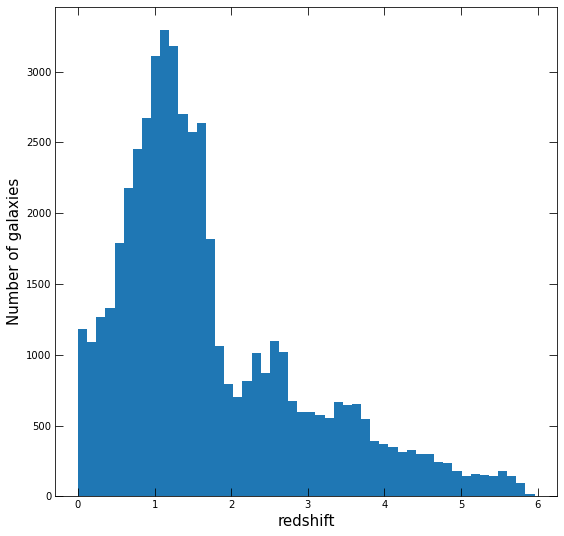

In [113]:
# Your plot here, mine for reference 

### Problem 2.7

Now do the same, but separately plot the distributions of redshift for those with spectroscopic redshifts and those that only have photometric. For this, you'll want to set `density=True` in your `hist`, and play with the linestyles and opacities so that both are visible. 

**Bonus (+0.5): Use KDE from seaborn to smoothly represent the distribution**. 

In [114]:
# build specz list 

In [115]:
# build photz list 

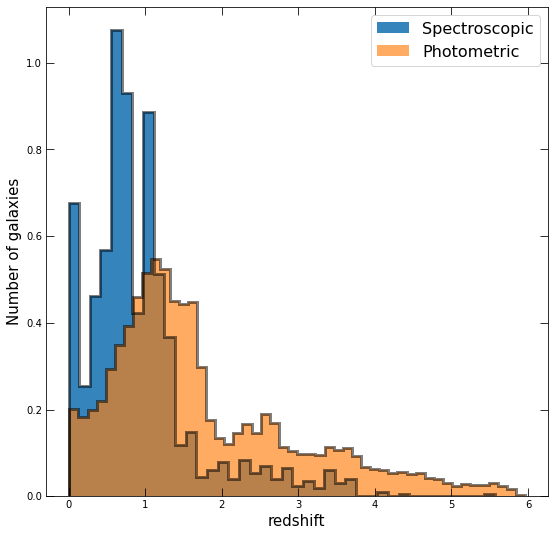

In [143]:
# Plot it; here's mine!

**Do the differences between the two distributions make sense? Why or why not?**

In [ ]:
# answer here

## Problem 3

The [UVJ diagram](https://iopscience.iop.org/article/10.3847/2041-8213/ab2f8c/pdf) is a useful diagnostic tool in extragalactic astronomy which allows one to relatively accurately diagnose a galaxy as star forming or quiescent, even in the presence of dust. You can read more at the link if you're unfamiliar. It is composed by plotting the "U-V" color of the galaxy against the "V-J" colors. You'll likely know U and V (these are from the Johnsons-Cousin's filter system). J is a filter in the near infrared. 

In this problem, we're going to write a function that can create a UVJ diagram for subsets of our data, cutting on mass and redshift. 

You'll need to access the following columns in the data (besides redshift, which you've already handled):

- stellar mass: the mass of all the stars in the galaxy. (column: `lmass`, flagged value of -1)
- star formation rate: rate at which galaxy is forming stars. (column: `lsfr`, flagged value of -99.0)
- U band flux density (column: `l153`, flagged value of -99.0)
- V band flux density (column: `l155`, flagged value of -99.0)
- J band flux density (column: `l161`, flagged value of -99.0)

### Problem 3.1 

For step one, we need to be able to filter our dataframe for particular mass and redshift ranges. 

Write a function, `select_galaxies()`, which takes as arguments `M, delta_M, z, delta_z` (and our dataframe). 
It should then return a df of only systems between M-deltaM to M+deltaM, and z-deltaz to z+deltaz. The columns it should return are the ones specified above, plus 'z'.

There is actually a column in `rf_df` called `z`, that contains the spec_z if available or the peak z if not. At the time of writing, I cannot determine why this column was not included in the merge. In any case, set `df['z']` equal to `rf_df.z` before continuing, as you'll use it below.


```{note}
All masses and sfrs are in log units. 
```

Try your function out using a mass of 10, delta M of 0.5 (i.e., a bin from 9.5 - 10.5), a redshift of 1, and a delta z of 0.25.

In [ ]:
# Add rf_df.z to the dataframe df 

In [262]:
# Define your select galaxies function 


In [261]:
# Here's the output for the provided example 


### Problem 3.2

Great, we can now get subsamples in mass/redshift bins. This is important because the UVJ diagram actually changes as a function of mass and redshift. 

Next we need to get the colors out. Write a function `get_colors()` which takes the same arguments as your `select_galaxies()` function above. Inside, it should run `select_galaxies` passing through the arguments, and then from the resulting data frame, calculate U-V and U-J (see below). Add these as columns to said dataframe with names 'U-V' and 'V-J' and return it. 

Run this function with the same mass/redshift bin from above and look at it.

```{warning}
As noted above, the U,V, and J band data are in Fnu (flux densities). Thus, a color is computed via -2.5*log10(Lfilter1/Lfilter2)
```


In [263]:
#Define get colors 

In [264]:
#Here's the output you're looking for. 

,z,lmass,lsfr,l153,l155,l161,U-V,V-J
id,,,,,,,,
44,0.68402,9.89,-1.28,3.76739,14.43560,46.5213,1.458486,1.270543
92,0.69426,9.76,-0.03,8.08497,21.07790,48.3969,1.040372,0.902476
178,0.94790,10.36,-1.90,1.94721,8.60585,49.2509,1.613452,1.894051
194,0.65070,10.12,0.33,13.25220,42.32950,112.5340,1.260888,1.061602
236,0.53257,10.35,-0.74,8.31773,42.76950,111.6020,1.777823,1.041345
...,...,...,...,...,...,...,...,...
49702,0.53180,9.97,0.36,41.66110,91.52100,200.9220,0.854475,0.853767
50000,0.83535,9.84,0.23,9.25872,21.86220,52.2972,0.932857,0.946961
50399,0.68057,10.46,-10.14,6.08630,38.30250,119.6430,1.997184,1.236650


### Problem 3.3 

Now that we can easily grab U-V and V-J colors for subsamples, we're ready to plot! 

Next, set your xlim and ylim to (0,2) in V-J (x axis) and (0,2.8) in U-V (y axis).

Once you have the distribution plotted nicely, use the definitions of the bounding box provided in [Whitaker et al. 2011](https://iopscience.iop.org/article/10.1088/0004-637X/735/2/86/pdf) (Eqns 15, Fig 17 for example) to draw the box where quiescent galaxies sit. 

Finally, let's add the galaxies. For this example, use a log mass of 9.5 with a delta M of 2 (so, galaxies from $10^{7.5}$ $M_{\odot}$ to $10^{11.5}$ $M_{\odot}$), in the redshift range of 0.5 to 1.5. Can you identify the quiescent sequence?


### Bonus (+2) 

(+1) Now that you can easily plot up a UVJ diagram for a given mass/redshift bin, make a plot with 6 panels. Across the 3, plot the UVJ diagram in the redshift bins 0-0.5, 0.5-1.0, 1.0-2.0. In the top panel, include galaxies in the mass range 8-9.5, and in the bottom, 9.5-11. 

(+1) Feeling extra fancy? Use the conditions on the UVJ quiescent box to color the quiescent galaxies red and the star forming galaxies blue in you plots. 



## Wrap Up

We've barely scratched the surface for what we can do with `pandas`, but we hope that if you're planning to work with "large" amounts of data (say, 200 columns and 500,000 rows), then pandas is a great tool for working with them. 